#Sign Language Recognition

---



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from skimage.feature import hog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Image Preprocessing

In [ ]:
# Preprocessing function
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)
    skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)

    masked_image = cv2.bitwise_and(gray, gray, mask=skin_mask)

    _, thresholded = cv2.threshold(masked_image, 128, 255, cv2.THRESH_BINARY)

    edges = cv2.Canny(thresholded, 30, 70)

    return edges

#Feature Extraction

In [ ]:
# Extract HOG features from an image
def extract_hog_features(image):
    hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=False)
    return hog_features

#Data Preparation

In [ ]:
# Load and preprocess dataset
def load_dataset(data_dir):
    images = []
    labels = []

    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            image = cv2.imread(image_path)
            preprocessed_image = preprocess_image(image)
            hog_features = extract_hog_features(preprocessed_image)
            images.append(hog_features)
            labels.append(label)

    return images, labels



In [ ]:
data_dir = "/content/drive/MyDrive/CSE439PROJECT/asl_dataset"

In [ ]:
images, labels = load_dataset(data_dir)

<ipython-input-3-767ed76f57d7>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=False)


In [ ]:
# Split data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Prepare the data
train_data = np.array(train_data)
test_data = np.array(test_data)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

#Model Evaluation

In [ ]:
# Train Machine Learning Model (SVM)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(train_data, train_labels_encoded)


SVC(kernel='linear', random_state=42)

In [ ]:
# Evaluate Model
predictions = svm_classifier.predict(test_data)
test_accuracy = np.mean(predictions == test_labels_encoded)
classification_rep = classification_report(test_labels_encoded, predictions, target_names=label_encoder.classes_)

In [ ]:
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Test Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

       Eight       1.00      0.93      0.96        14
        Five       1.00      1.00      1.00         7
        Four       1.00      1.00      1.00        15
        Nine       1.00      1.00      1.00        14
         One       0.93      1.00      0.97        14
       Seven       1.00      0.93      0.97        15
         Six       0.89      1.00      0.94        16
       Three       1.00      0.90      0.95        10
         Two       1.00      0.88      0.94        25
        Zero       0.71      0.92      0.80        13
           a       1.00      0.95      0.97        19
           b       1.00      1.00      1.00        10
           c       1.00      0.87      0.93        15
           d       0.94      1.00      0.97        16
           e       1.00      1.00      1.00         9
           f       1.00      1.00      1.00        12
           g       1.00      0.92    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(train_data, train_labels_encoded)

RandomForestClassifier(random_state=42)

In [ ]:
rf_predictions = random_forest_classifier.predict(test_data)
rf_test_accuracy = np.mean(rf_predictions == test_labels_encoded)
rf_classification_rep = classification_report(test_labels_encoded, rf_predictions, target_names=label_encoder.classes_)

In [ ]:
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("Random Forest Classification Report:\n", rf_classification_rep)

Random Forest Test Accuracy: 0.8866799204771372
Random Forest Classification Report:
               precision    recall  f1-score   support

       Eight       1.00      1.00      1.00        14
        Five       1.00      1.00      1.00         7
        Four       1.00      0.93      0.97        15
        Nine       1.00      1.00      1.00        14
         One       0.78      1.00      0.88        14
       Seven       0.93      0.93      0.93        15
         Six       0.88      0.88      0.88        16
       Three       0.90      0.90      0.90        10
         Two       0.95      0.72      0.82        25
        Zero       0.70      0.54      0.61        13
           a       0.94      0.84      0.89        19
           b       0.91      1.00      0.95        10
           c       1.00      0.87      0.93        15
           d       1.00      1.00      1.00        16
           e       0.82      1.00      0.90         9
           f       0.92      1.00      0.96      

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_data, train_labels_encoded)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_predictions = knn_classifier.predict(test_data)
knn_test_accuracy = np.mean(knn_predictions == test_labels_encoded)
knn_classification_rep = classification_report(test_labels_encoded, knn_predictions, target_names=label_encoder.classes_)


In [ ]:
print("K-Nearest Neighbors Test Accuracy:", knn_test_accuracy)
print("K-Nearest Neighbors Classification Report:\n", knn_classification_rep)

K-Nearest Neighbors Test Accuracy: 0.8807157057654076
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

       Eight       1.00      0.86      0.92        14
        Five       1.00      0.86      0.92         7
        Four       1.00      1.00      1.00        15
        Nine       1.00      1.00      1.00        14
         One       0.70      1.00      0.82        14
       Seven       1.00      0.80      0.89        15
         Six       0.94      0.94      0.94        16
       Three       1.00      0.90      0.95        10
         Two       1.00      0.84      0.91        25
        Zero       0.69      0.85      0.76        13
           a       0.90      0.95      0.92        19
           b       0.77      1.00      0.87        10
           c       0.93      0.87      0.90        15
           d       0.94      0.94      0.94        16
           e       1.00      0.89      0.94         9
           f       1.00      1.00    

In [ ]:
# Train and Evaluate Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(train_data, train_labels_encoded)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_predictions = decision_tree_classifier.predict(test_data)
dt_test_accuracy = np.mean(dt_predictions == test_labels_encoded)
dt_classification_rep = classification_report(test_labels_encoded, dt_predictions, target_names=label_encoder.classes_)

In [ ]:
print("Decision Tree Test Accuracy:", dt_test_accuracy)
print("Decision Tree Classification Report:\n", dt_classification_rep)

Decision Tree Test Accuracy: 0.47713717693836977
Decision Tree Classification Report:
               precision    recall  f1-score   support

       Eight       0.60      0.43      0.50        14
        Five       0.36      0.57      0.44         7
        Four       0.45      0.60      0.51        15
        Nine       0.50      0.43      0.46        14
         One       0.56      0.36      0.43        14
       Seven       0.67      0.67      0.67        15
         Six       0.36      0.25      0.30        16
       Three       0.60      0.90      0.72        10
         Two       0.54      0.28      0.37        25
        Zero       0.16      0.23      0.19        13
           a       0.75      0.63      0.69        19
           b       0.35      0.60      0.44        10
           c       0.44      0.47      0.45        15
           d       0.53      0.56      0.55        16
           e       0.57      0.44      0.50         9
           f       0.38      0.50      0.43     

#Result Analysis

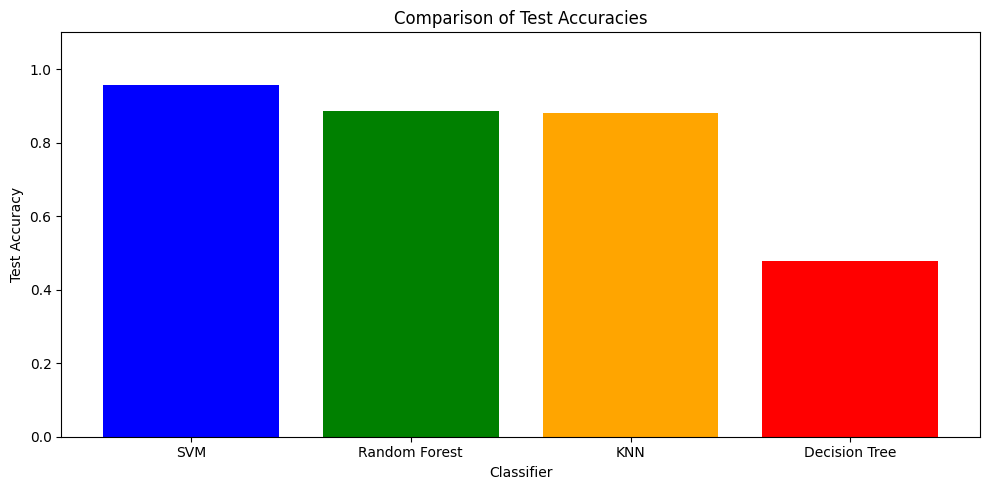

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Test accuracies
test_accuracies = [test_accuracy, rf_test_accuracy, knn_test_accuracy, dt_test_accuracy]
classifier_names = ['SVM', 'Random Forest', 'KNN', 'Decision Tree']

# Plot the comparison of test accuracies
plt.figure(figsize=(10, 5))
plt.bar(classifier_names, test_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
plt.ylim(0, 1.1)  # Set y-axis limit for clarity
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


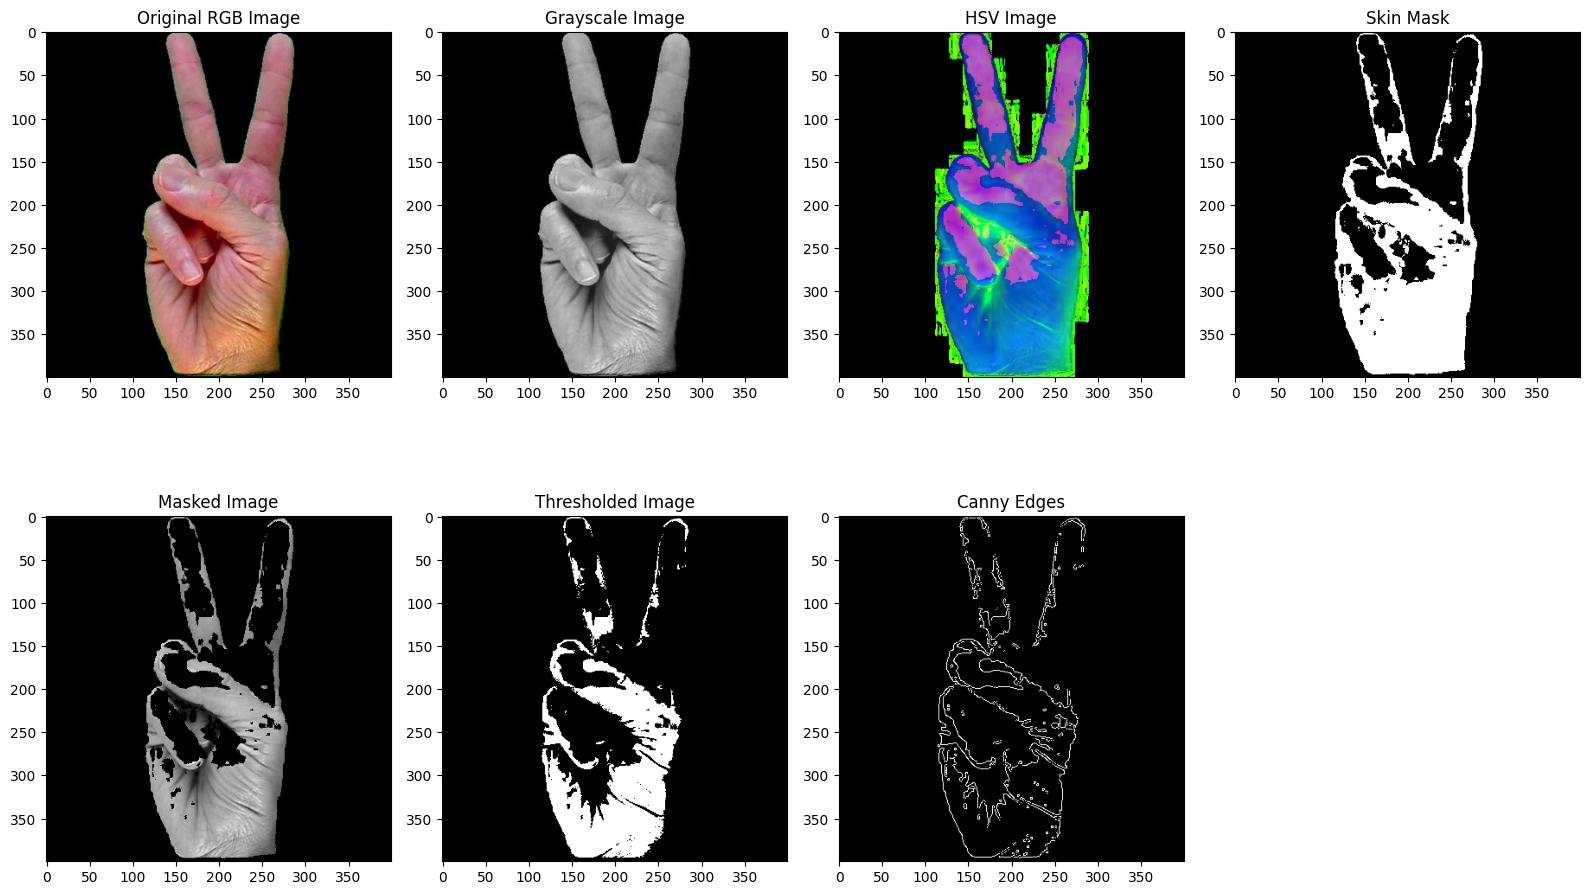

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the original RGB image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Skin masking
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)
    skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)

    # Apply skin mask to grayscale image
    masked_image = cv2.bitwise_and(gray, gray, mask=skin_mask)

    # Thresholding
    _, thresholded = cv2.threshold(masked_image, 128, 255, cv2.THRESH_BINARY)

    # Canny edge detection
    edges = cv2.Canny(thresholded, 30, 70)

    return image, gray, hsv, skin_mask, masked_image, thresholded, edges

# Load an example RGB image
image_path = "/content/drive/MyDrive/CSE439PROJECT/asl_dataset/Two/hand1_2_bot_seg_1_cropped.jpeg"

# Preprocess the image
image, gray, hsv, skin_mask, masked_image, thresholded, edges = preprocess_image(image_path)

# Plot the preprocessed images using imshow
plt.figure(figsize=(16, 10))
plt.subplot(2, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original RGB Image')
plt.subplot(2, 4, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(2, 4, 3), plt.imshow(hsv), plt.title('HSV Image')
plt.subplot(2, 4, 4), plt.imshow(skin_mask, cmap='gray'), plt.title('Skin Mask')
plt.subplot(2, 4, 5), plt.imshow(masked_image, cmap='gray'), plt.title('Masked Image')
plt.subplot(2, 4, 6), plt.imshow(thresholded, cmap='gray'), plt.title('Thresholded Image')
plt.subplot(2, 4, 7), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.tight_layout()
plt.show()


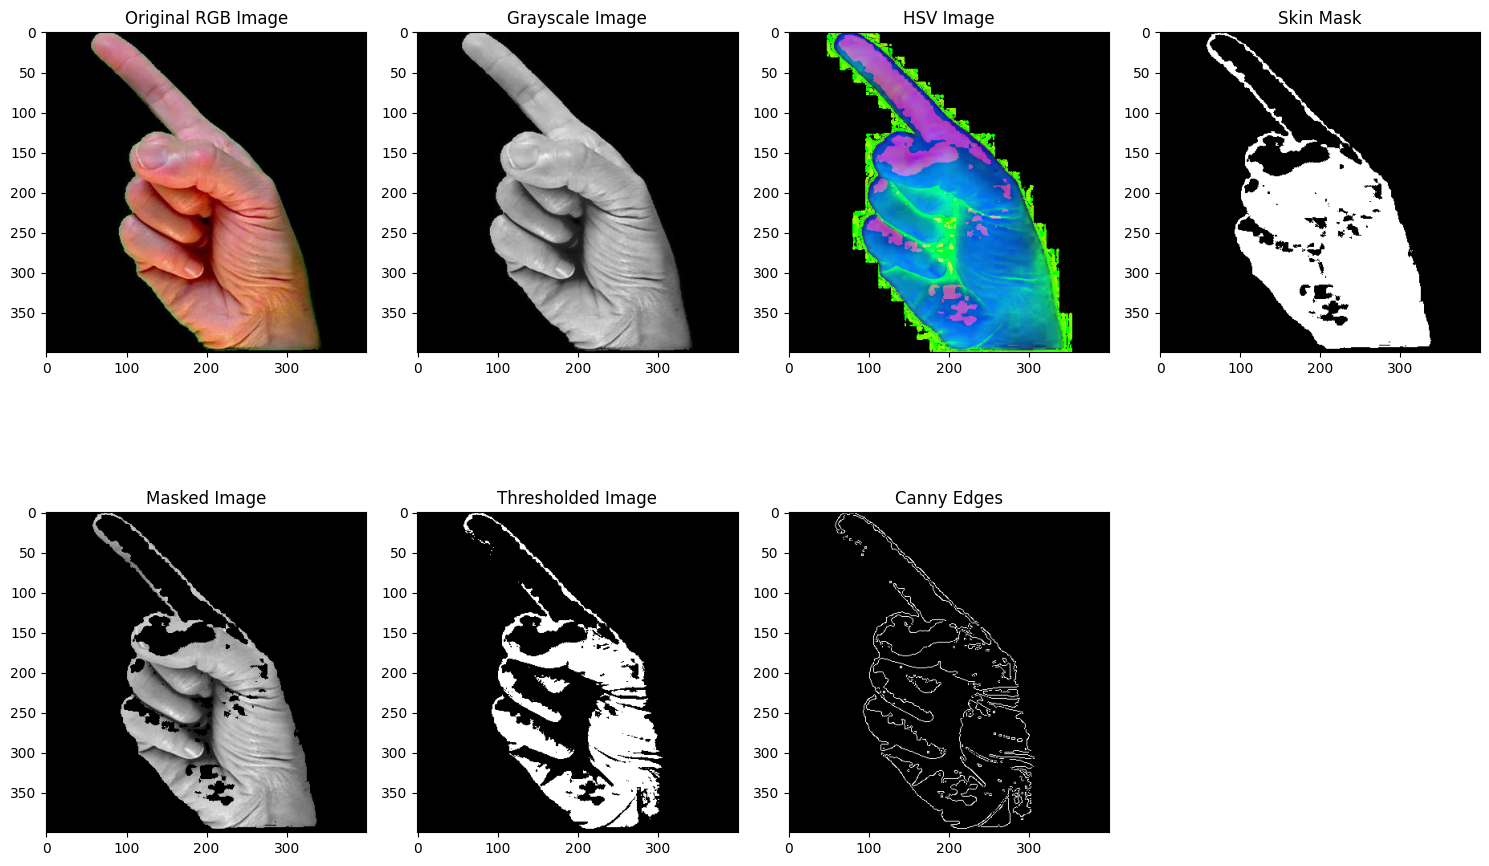

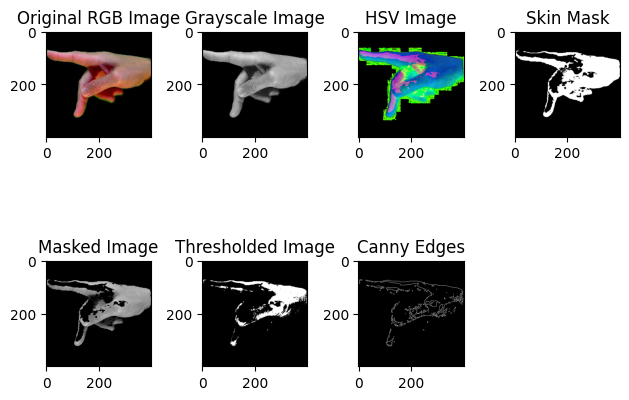

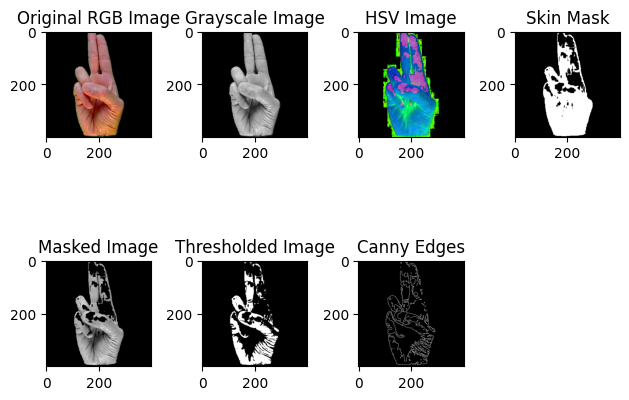

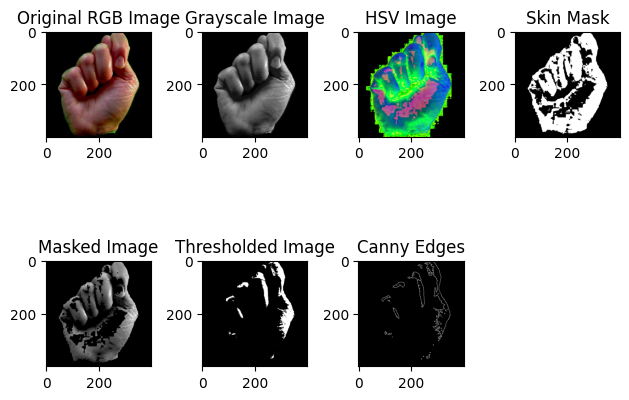

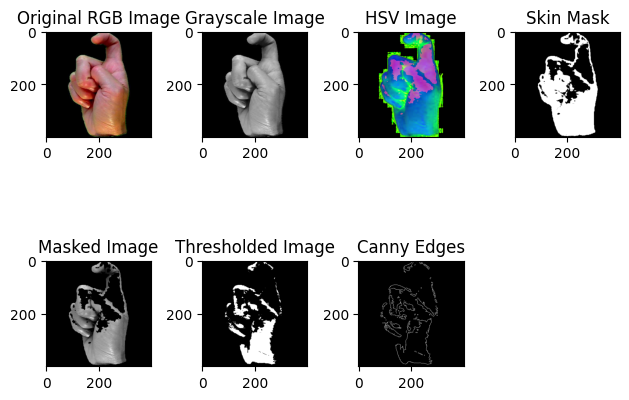

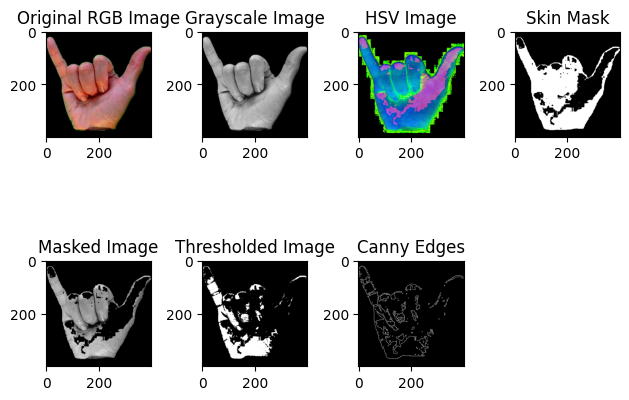

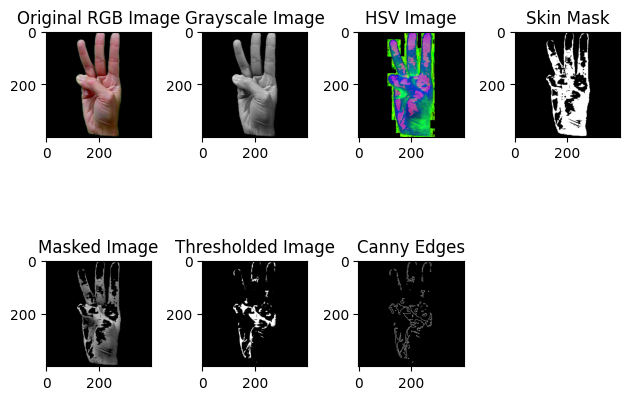

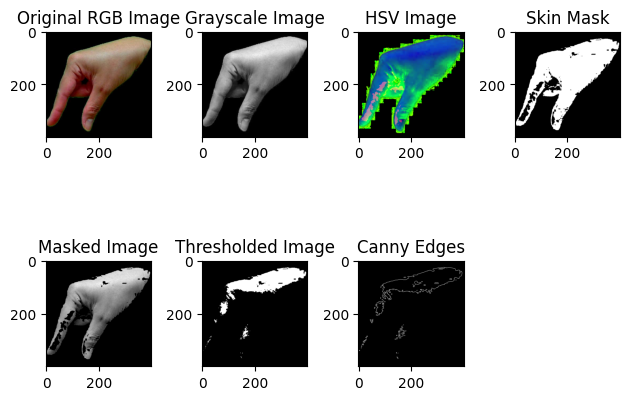

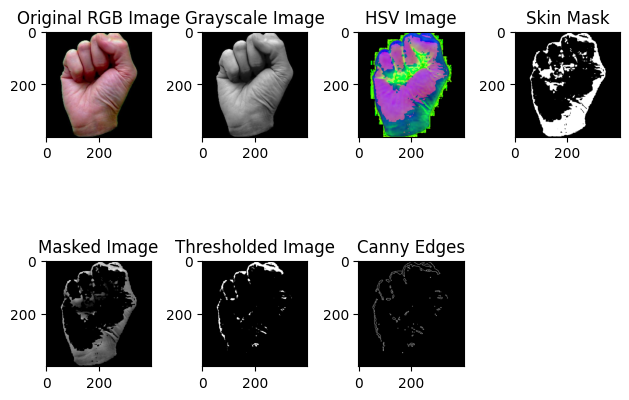

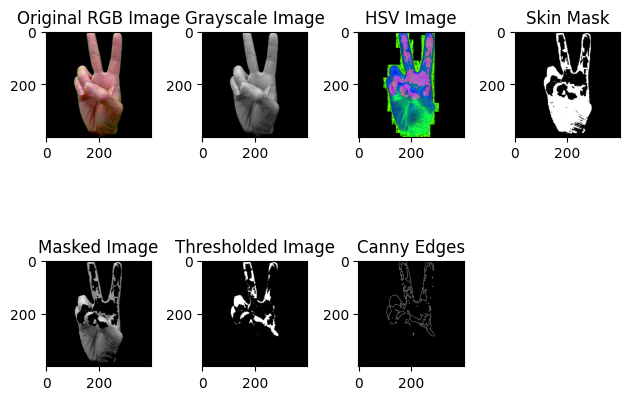

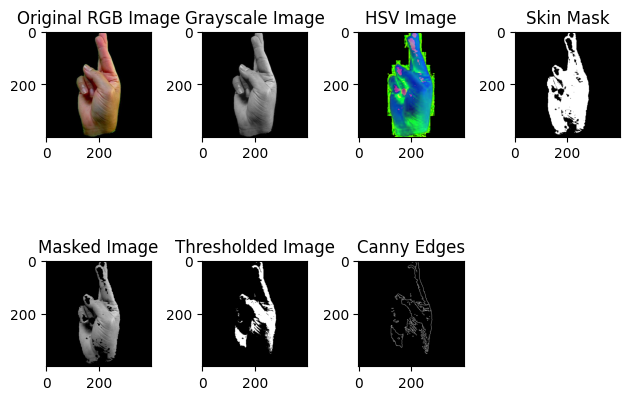

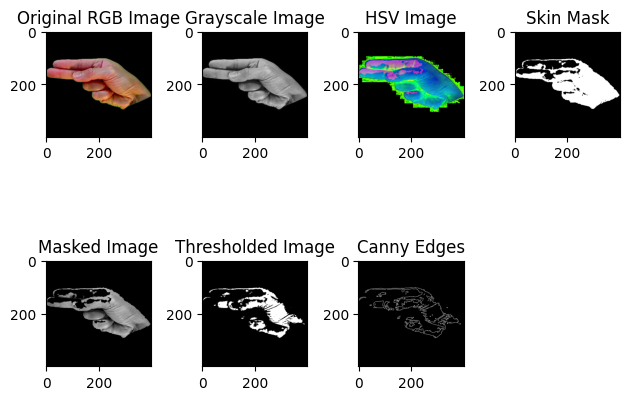

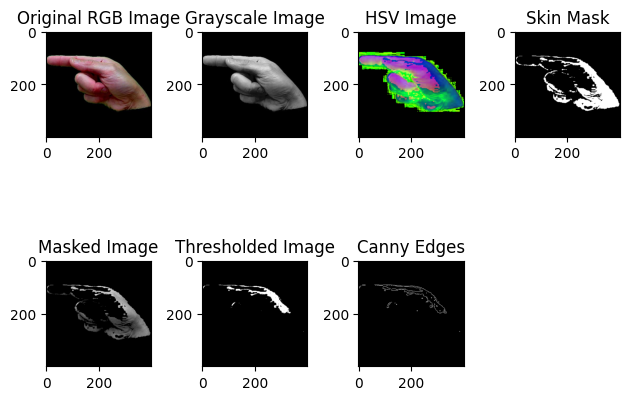

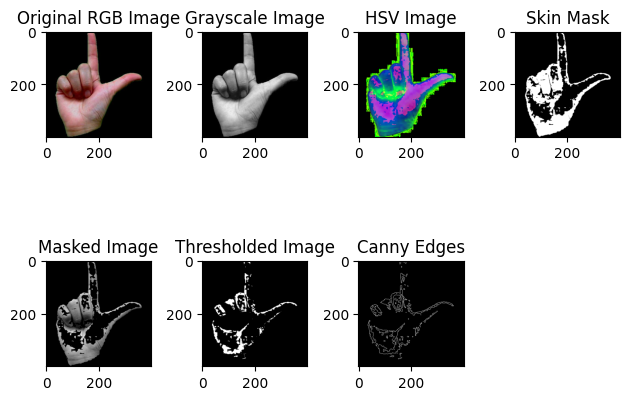

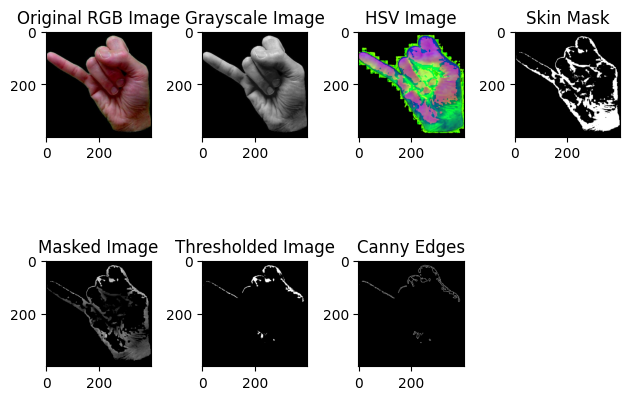

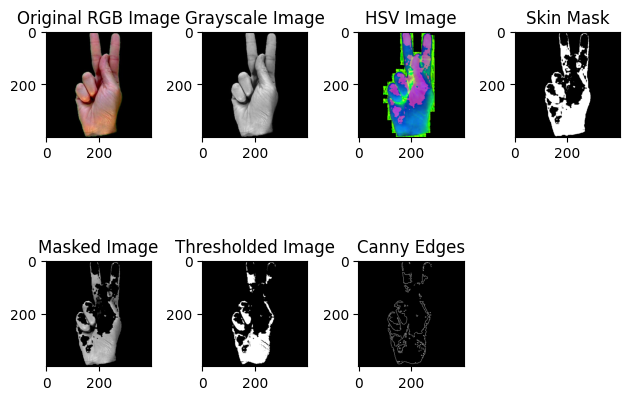

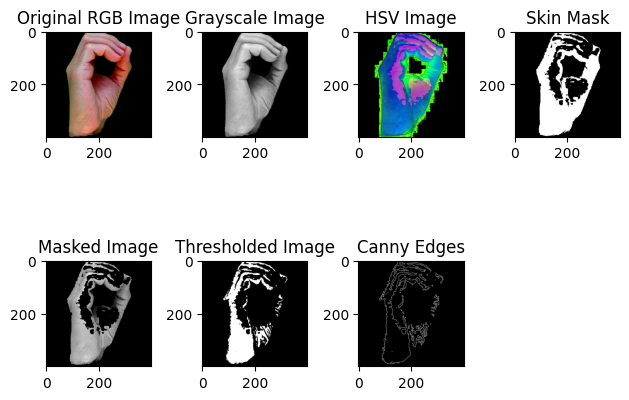

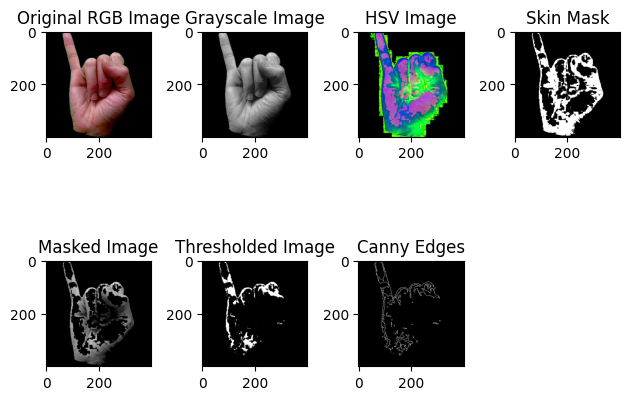

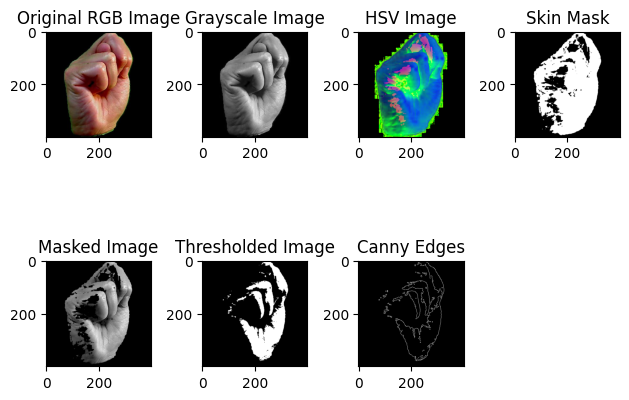

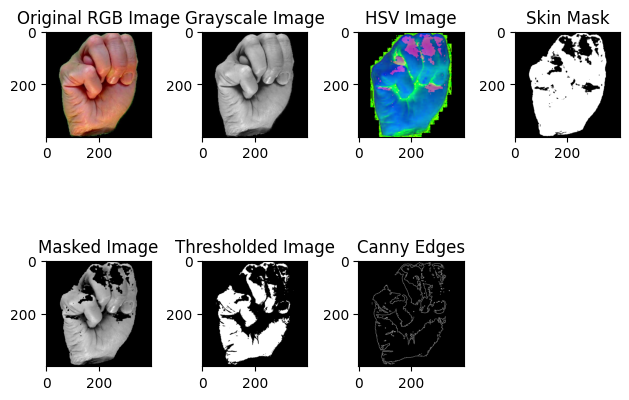

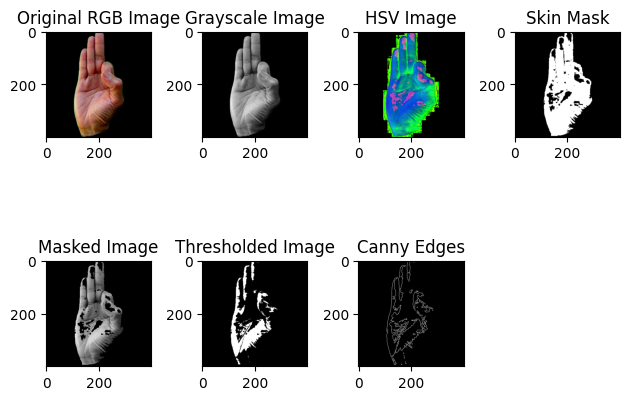

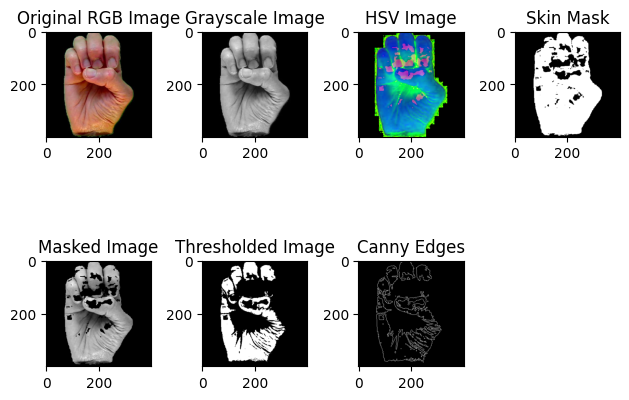

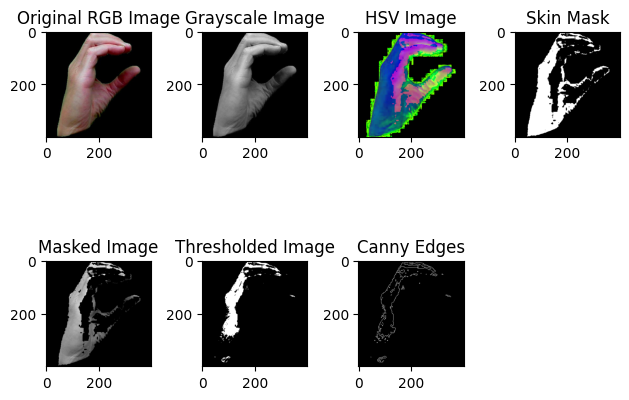

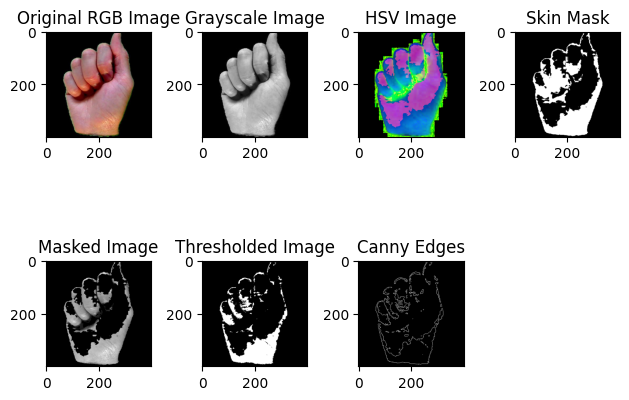

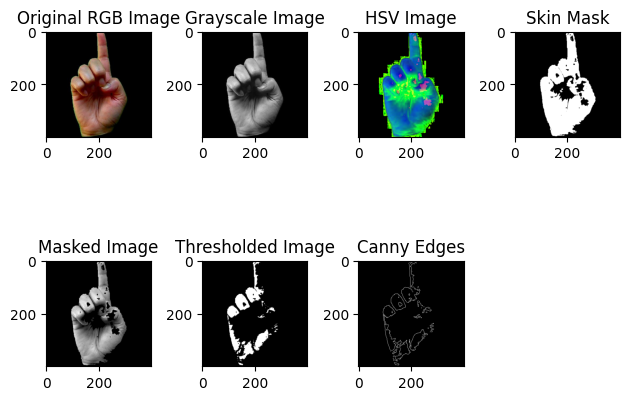

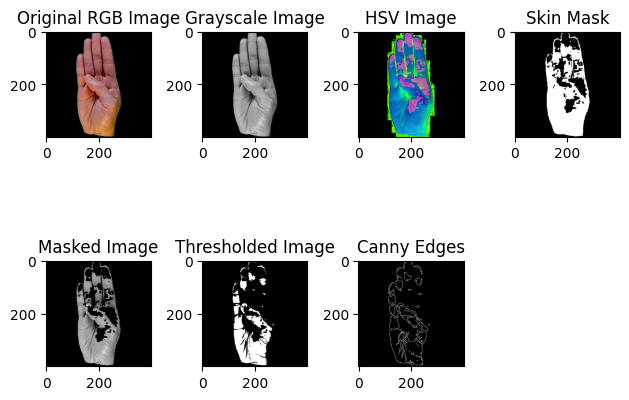

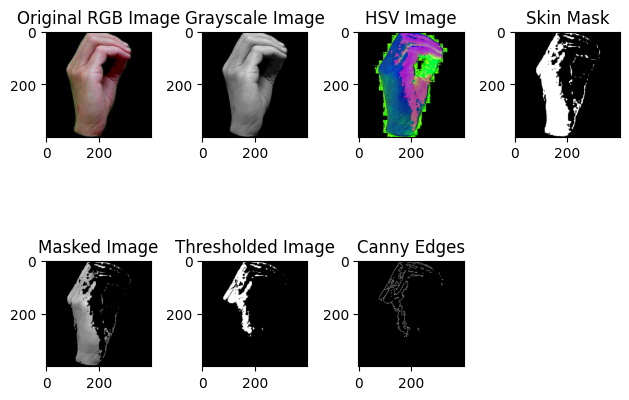

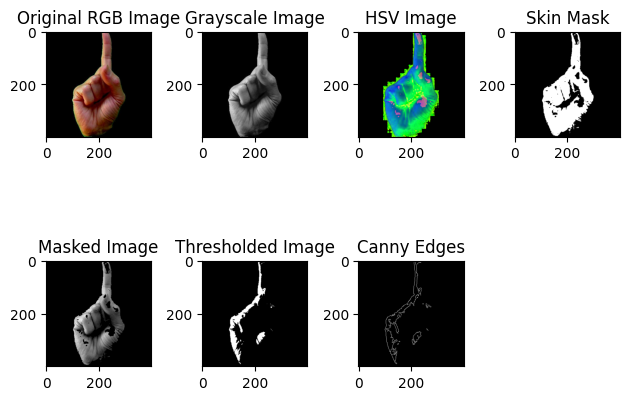

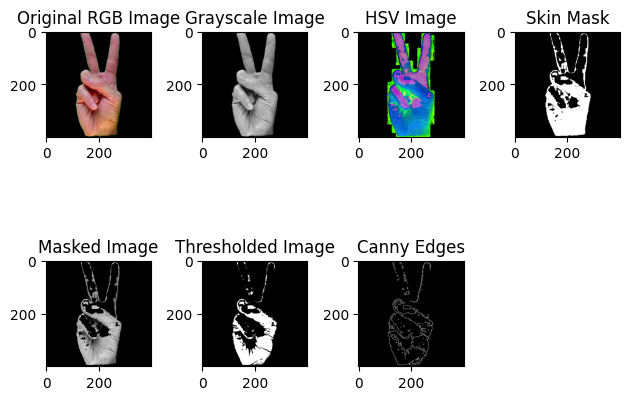

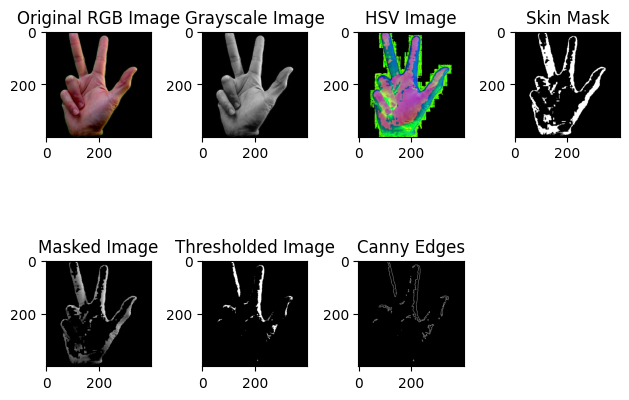

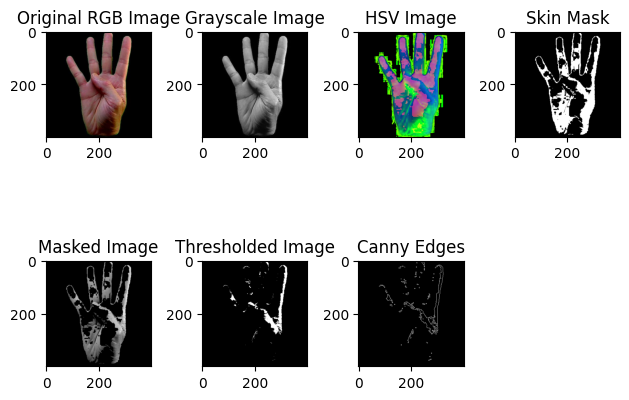

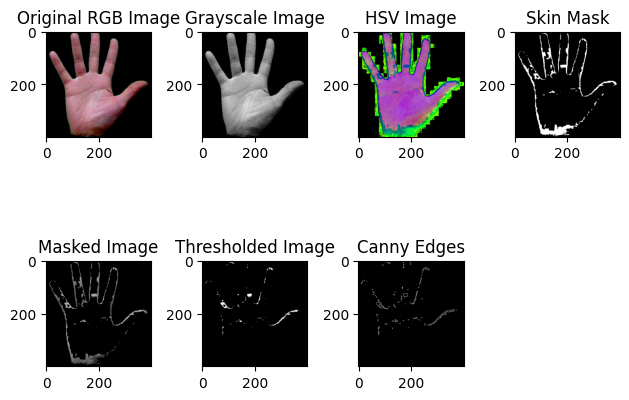

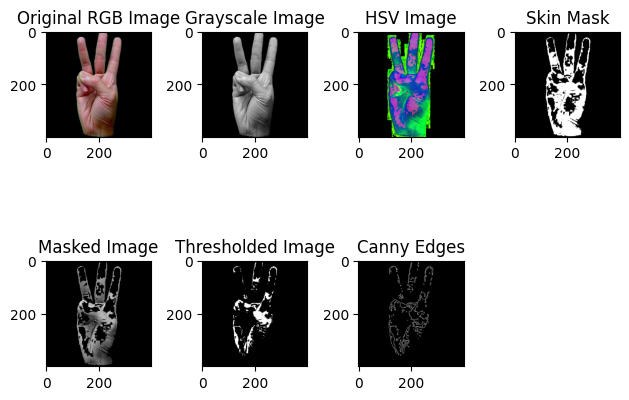

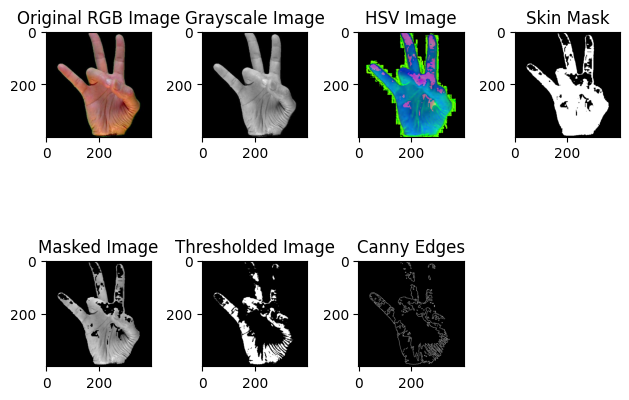

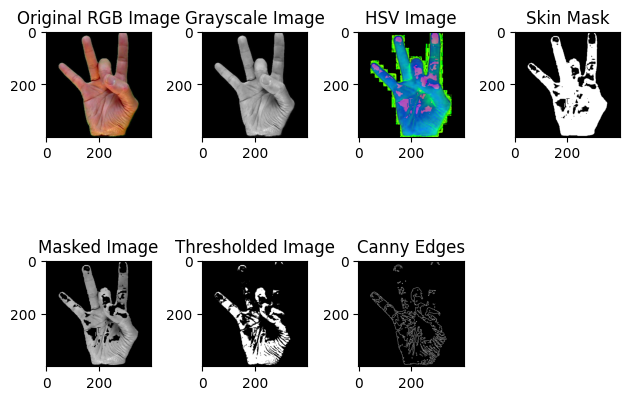

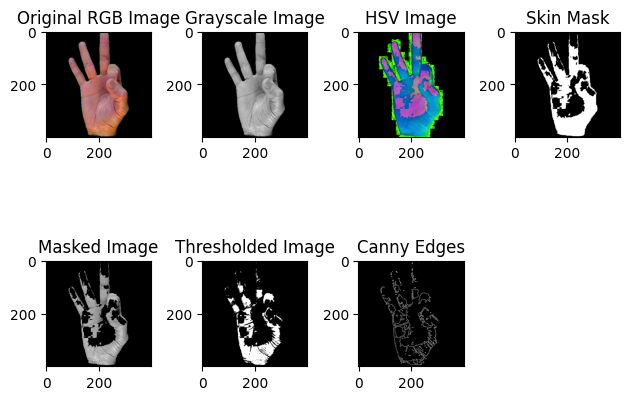

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
# List of classes (subdirectories in the dataset directory)
classes = os.listdir(data_dir)

# Initialize a figure for displaying images
plt.figure(figsize=(15, 10))

# Iterate over each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)

    # Get the first image in the class directory
    image_name = os.listdir(class_dir)[0]
    image_path = os.path.join(class_dir, image_name)

    # Preprocess the image
    image, gray, hsv, skin_mask, masked_image, thresholded, edges = preprocess_image(image_path)

    # Display the preprocessed images
    plt.subplot(2, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original RGB Image')
    plt.subplot(2, 4, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image')
    plt.subplot(2, 4, 3), plt.imshow(hsv), plt.title('HSV Image')
    plt.subplot(2, 4, 4), plt.imshow(skin_mask, cmap='gray'), plt.title('Skin Mask')
    plt.subplot(2, 4, 5), plt.imshow(masked_image, cmap='gray'), plt.title('Masked Image')
    plt.subplot(2, 4, 6), plt.imshow(thresholded, cmap='gray'), plt.title('Thresholded Image')
    plt.subplot(2, 4, 7), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')

    plt.tight_layout()
    plt.show()